# Data Science Product Proposal and Demonstration by Tate Kennedy

## An Unambiguous Standard for the Certification and Quality Assessment in the Production of Wine while Keeping with Demand

The purpose of this Notebook is to demonstrate how the application of machine learning techniques can transform the wine production industry from an existing subjective, cumbersome and costly production model to an objective, efficient and large scale cost effective process that addresses increasing risks in the production of wine that continue to grow with demand.

## Necessary Imports

In [109]:
# Standard imports.
import pandas as pd
import numpy as np

# Visualization.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Statistics/mathematics.
import scipy.stats as stats
from collections import Counter
import math

# Dimensionality reduction.
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Model evaluation.
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

# Models.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

## The Data

Sensory test data and physicochemical test data were collected for red and white variants of the Portugese “Vindho Verde” wine with the aim to explore the relationship between the two types of test results.

Datasets are available from the UCI Machine Learning repository https://archive.ics.uci.edu/ml/datasets/wine+quality

(P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009).

In [2]:
# The white wine data set will be utilized within this notebook.

# Loading the dataset.
white_wine = pd.read_csv('C:\\Users\\kenne\\Desktop\\winequality-white.csv', encoding='utf-8')

# Quick preview to confirm dataset loaded correctly.
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Data is presented in a tabular format above and appears to have loaded as intended. 

In [3]:
# Now I will explore the dataframe I just created further.

# Details about the amount and types of data included.
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


There are 4,898 samples included in this dataset for modeling purposes.

There are a total of 12 columns included, with 11 columns set as float datatype and 1 column (quality) set as an integer datatype.

There appears to be no missing values, which will confirm separately as well.

Total memory used by this dataframe equals 459.3 KB.

In [4]:
# Separate confirmation I have no missing values.
white_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no missing values in this instance.

In the future event of missing values:

You could decide to drop (.dropna()) any row(s) that contain missing values if you feel that will not impact the size of your sample. There are different hyperparameters that can be passed to customize how/which rows you would drop.

But if you believe missing data matters because it could cause loss in statistical power or bias in your data, then there are other approaches you could take:

There are many methods of imputation (.fillna()) but the most straightforward involves replacing missing values with the mean, median or mode.

In [5]:
# Now I will look at some descriptive statistics to further introduce the data used and determine if I have any potential outliers.

# Include='all' is not necessary here since all columns are in some numerical format (this is a personal preference/best practice).
white_wine.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


The data seems to be in the best form possible for my analysis and model building. Based on the mean and standard deviation scores, I will keep an eye on potential outliers in the residual sugar, free sulfur dioxide and total sulfur dioxide columns during my additional data exploration steps to come.

Note of interest, no wine sample was given a perfect quality score (the outcome of interest,as I'll discuss later) of 10 (9 was the maximum score provided and 3 was the minimum). Scores were not given fractional or decimal point values, all scores are whole number values.

## Exploring the Data

In the early stages of model building, visuals help you get acquainted with new data and identify potential problems.

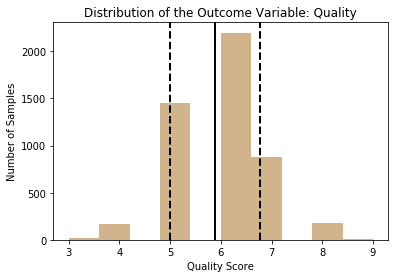

In [6]:
# I will begin by looking at the distribution of the outcome of interest or dependent variable, the quality of white wine.

# Create a histogram. The histogram will show you the possible values of a variable and how common they are.
plt.hist(white_wine['quality'], color='tan')

# Setting my labels.
plt.ylabel('Number of Samples')
plt.xlabel('Quality Score')
plt.title('Distribution of the Outcome Variable: Quality')

# Visualizing the mean and one standard deviation.
x = white_wine['quality']
plt.axvline(x.mean(), color='black', linestyle='solid', linewidth=2)
plt.axvline(x.mean() + x.std(), color='black', linestyle='dashed', linewidth=2)
plt.axvline(x.mean() - x.std(), color='black', linestyle='dashed', linewidth=2)

plt.show()

The dependent variable, quality, is normally distributed. The data is not centered but clusters at the mean and the majority of the data is with one standard deviation left or right of the mean.

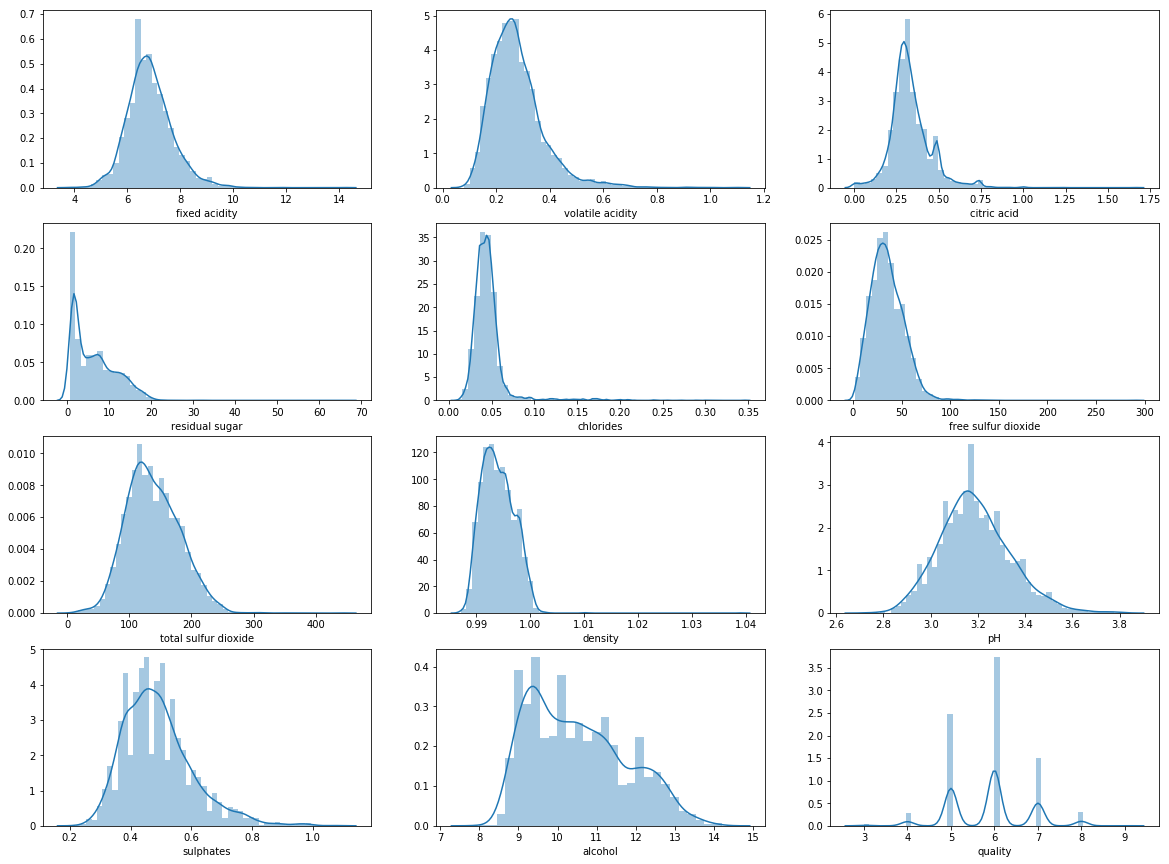

In [7]:
# Next, I will look at the univariate distributions of all variables in the dataset by creating a subplot of histograms with distplots.

# Setting the number of subplots and size.
fig, ax = plt.subplots(4,3, figsize=(20, 15))

# Creating distplots for each variable.
sns.distplot(white_wine['fixed acidity'], ax=ax[0][0])
sns.distplot(white_wine['volatile acidity'], ax=ax[0][1])
sns.distplot(white_wine['citric acid'], ax=ax[0][2])

sns.distplot(white_wine['residual sugar'], ax=ax[1][0])
sns.distplot(white_wine.chlorides, ax=ax[1][1])
sns.distplot(white_wine['free sulfur dioxide'], ax=ax[1][2])

sns.distplot(white_wine['total sulfur dioxide'], ax=ax[2][0])
sns.distplot(white_wine.density, ax=ax[2][1])
sns.distplot(white_wine.pH, ax=ax[2][2])

sns.distplot(white_wine.sulphates, ax=ax[3][0])
sns.distplot(white_wine.alcohol, ax=ax[3][1])
sns.distplot(white_wine.quality, ax=ax[3][2])

plt.show()

The independent variables primarily show a normal bell cruve distribution. Remember, quality is our dependent variable or outcome of interest, which I looked at individually above.

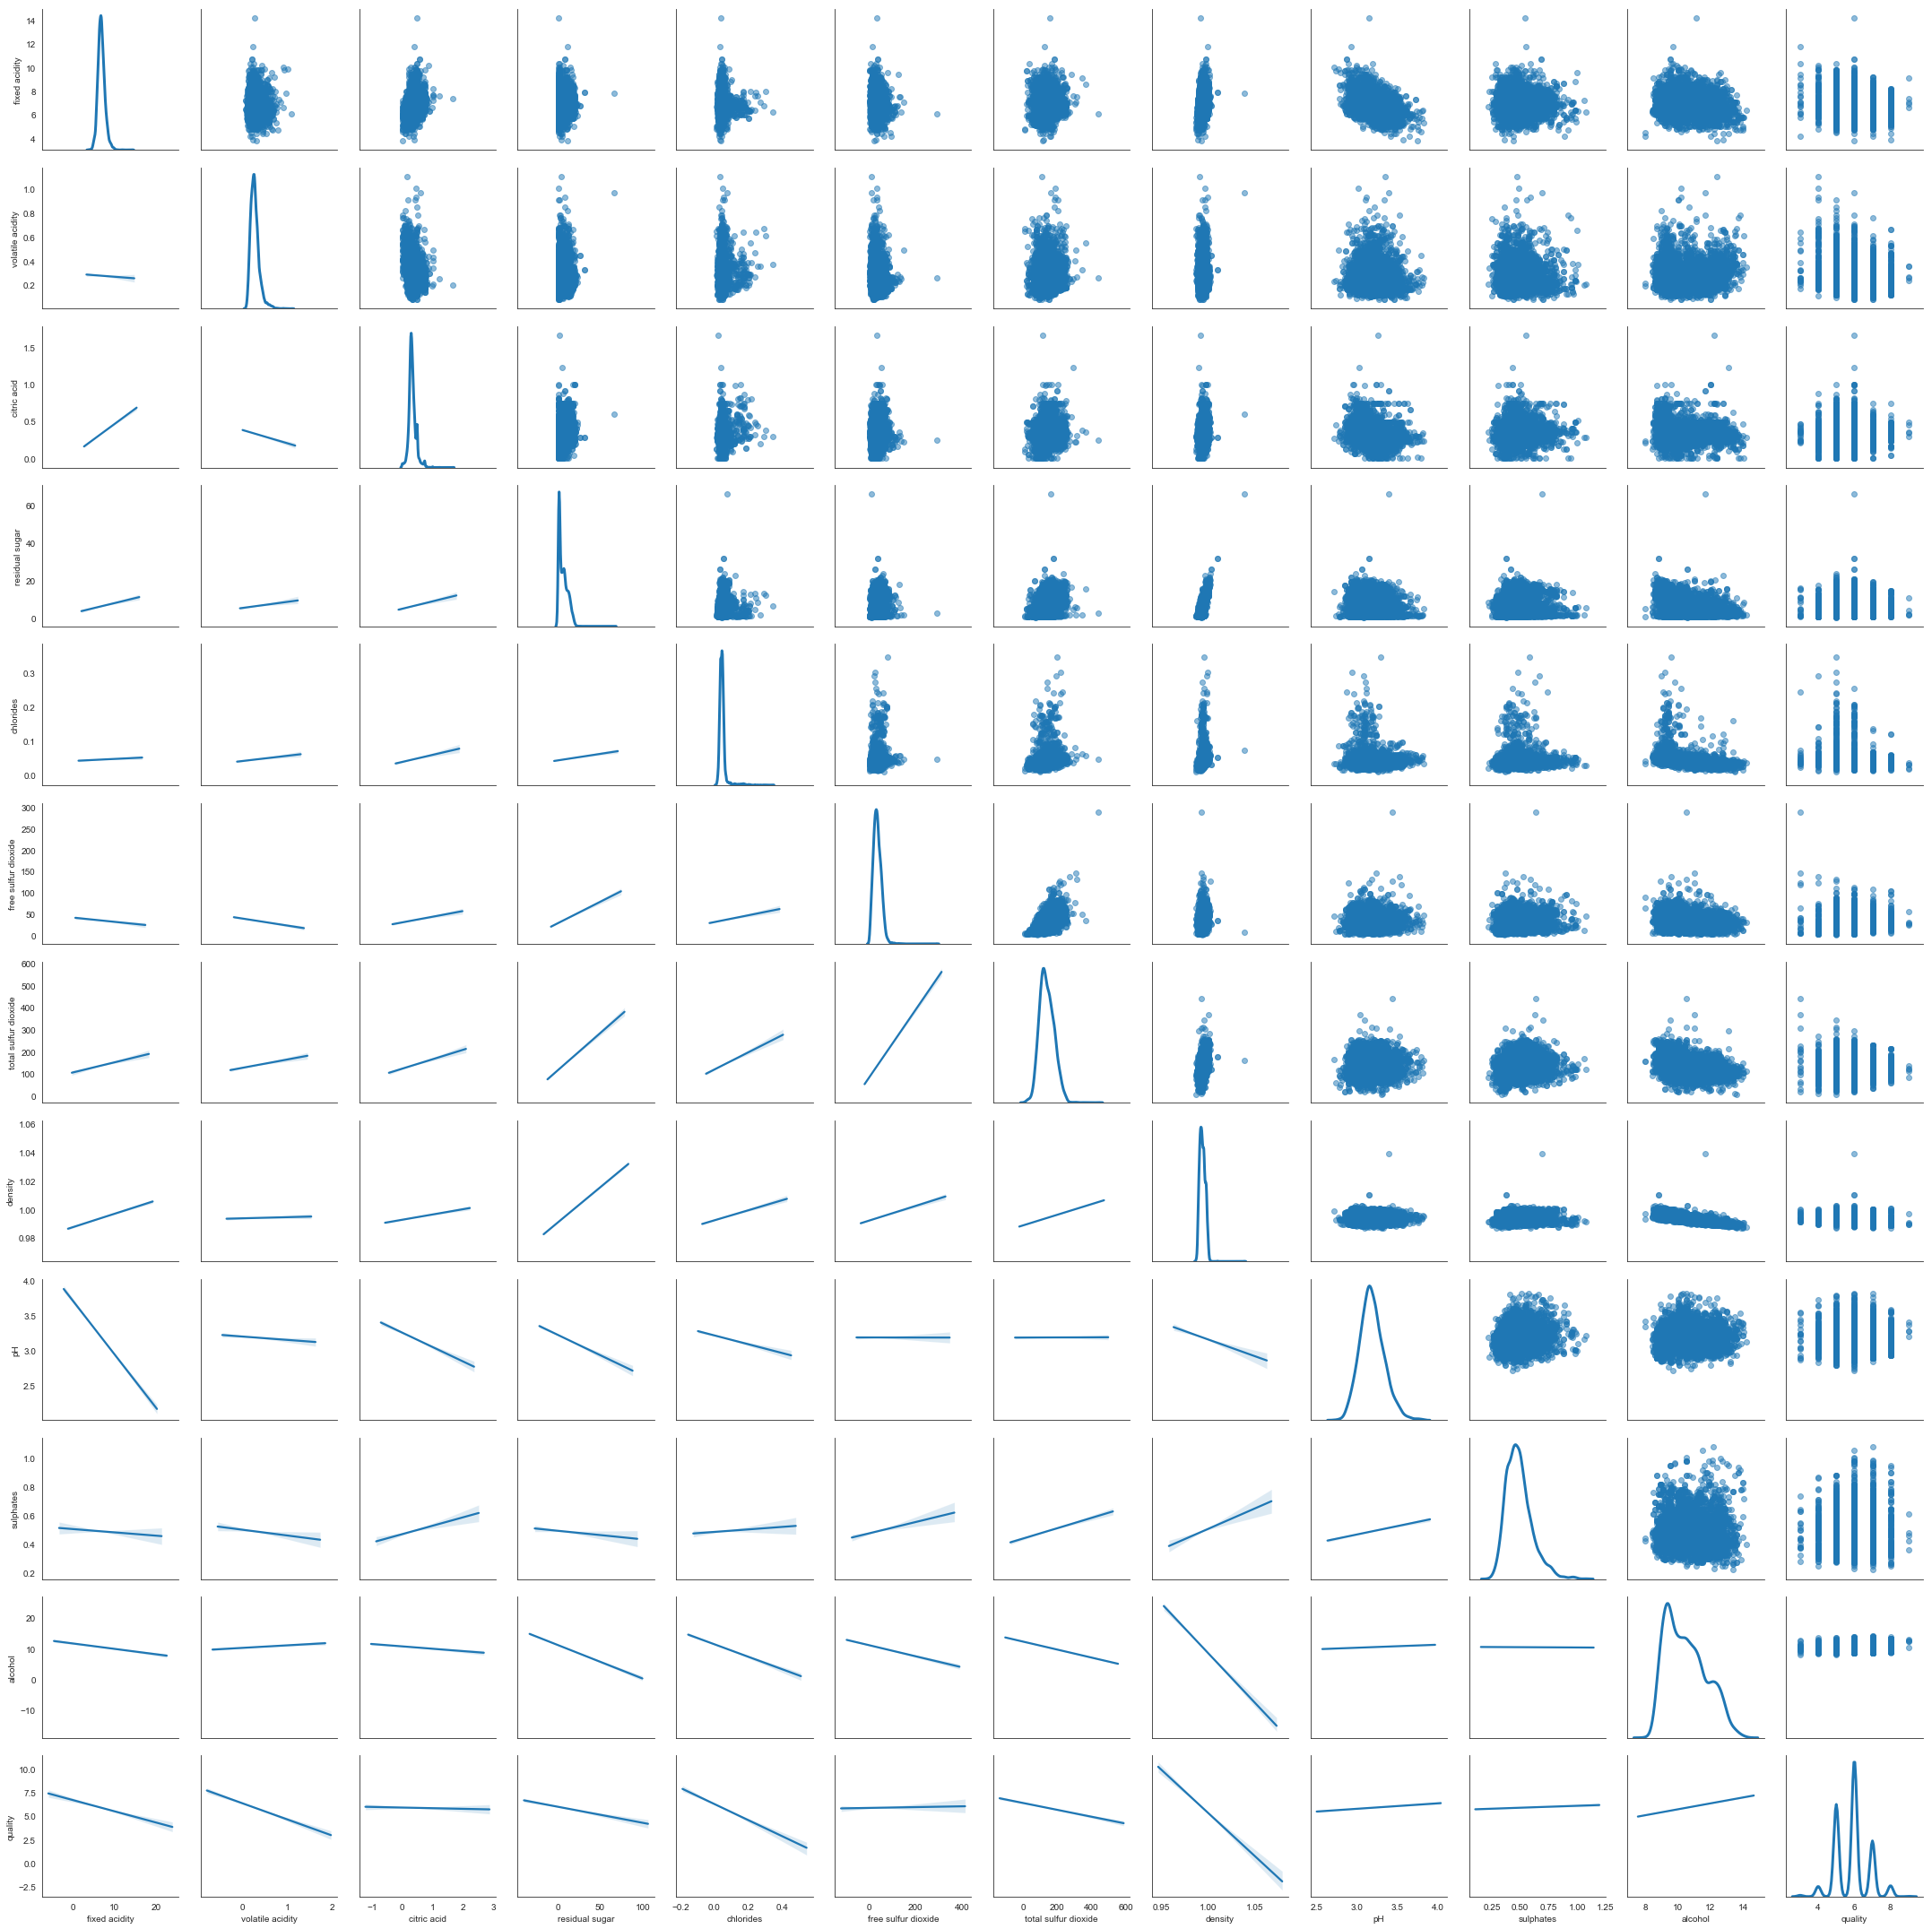

In [8]:
# Now I will begin looking at the bivariate relationships in the dataset.

# Create a scatterplot matrix that shows all the bivariate relationships in the dataset.
sns.set_style('white')

g = sns.PairGrid(white_wine, diag_sharey=False)
g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)

plt.show()

The scatterplot matrix above shows all the bivariate relationships in the dataset in one plot made up of several subplots. I will continue with this bivariate relationship review below.

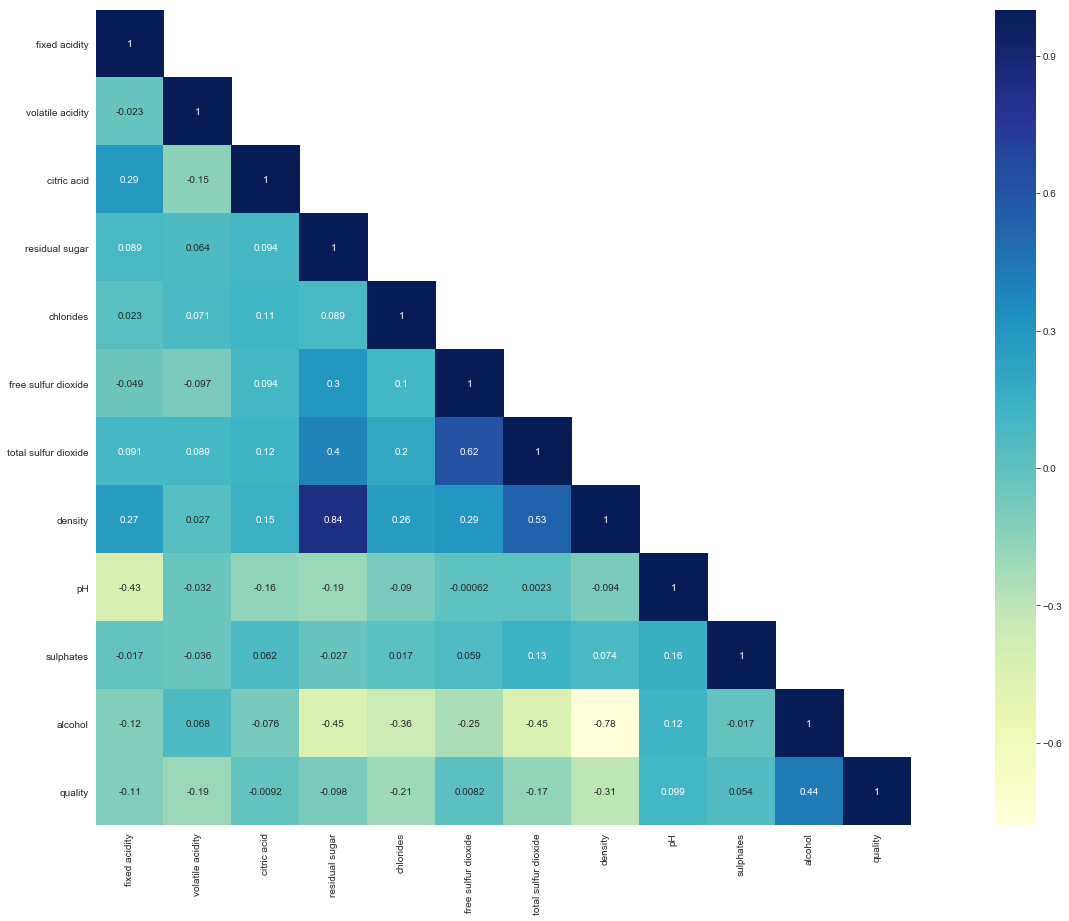

In [9]:
# Create a heatmap with correlation matrix embedded in each square.
plt.figure(figsize=(30,15))

cor_mat = white_wine.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(white_wine.corr(), mask=mask, cmap='YlGnBu', square=True, annot=True)

plt.show()

In [10]:
# Create a standalone correlation matrix.
white_wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


Heatmaps are a great way to get a quick visual read on a big correlation matrix. Correlations range from -1 (as values in one variable go up, values in the other go down) to 0 (no relationship between the variables) to 1 (as values in one variable go up, values in the other go up as well).

Based on the views above, it seems that density and residual sugar are highly correlated, while density and alcohol have an inverse relationship.

The outcome of interest, quality, seems to be most influenced by alcohol.

Citric acid and free sulfur dioxide have little to no relationship with the quality in white wine. They may be strong candidates to remove from our model.

In [11]:
# Now I am going to convert the target variable quality into categories for classification purposes within a new column.

# I will take the recommendation from the sensory test that any wine with a quality score of 7 or higher is considered good.
grade = []
for qual in white_wine['quality']:
    if qual < 7:
        grade.append('Bad')
    else:
        grade.append('Good')
white_wine['grade'] = grade

In [12]:
# Confirming creation of the new column/variable, grade.
white_wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,grade
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,Bad
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,Bad
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,Bad
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,Good
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,Bad


      grade
Bad    3838
Good   1060


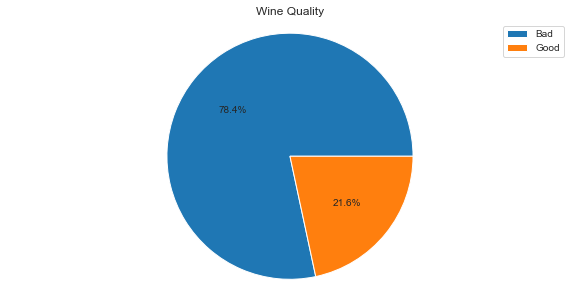

In [13]:
# Continuing my exploratory data analyis with the new categorical variable before encoding for modeling purposes.

# View results by new grade category.
plt.figure(figsize=(10, 5))

grade_counts = pd.DataFrame(white_wine['grade'].value_counts())
print(grade_counts)

plt.pie(grade_counts, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Wine Quality')
plt.legend(grade_counts.index)

plt.show()

The dataset demonstrates a potential class imbalance issue, where the outcome in the quality of wine as 'Bad' (78%) is much more common than 'Good'. I will use the dominant class rate as a baseline for performance during the modeling process rather than trying to solve for the imbalance by oversampling the minority class or undersampling the majority class.

For furture reference, other ways of dealing with class imbalance is to use probability outputs or to create cost functions for errors.

C:\Users\kenne\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\kenne\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


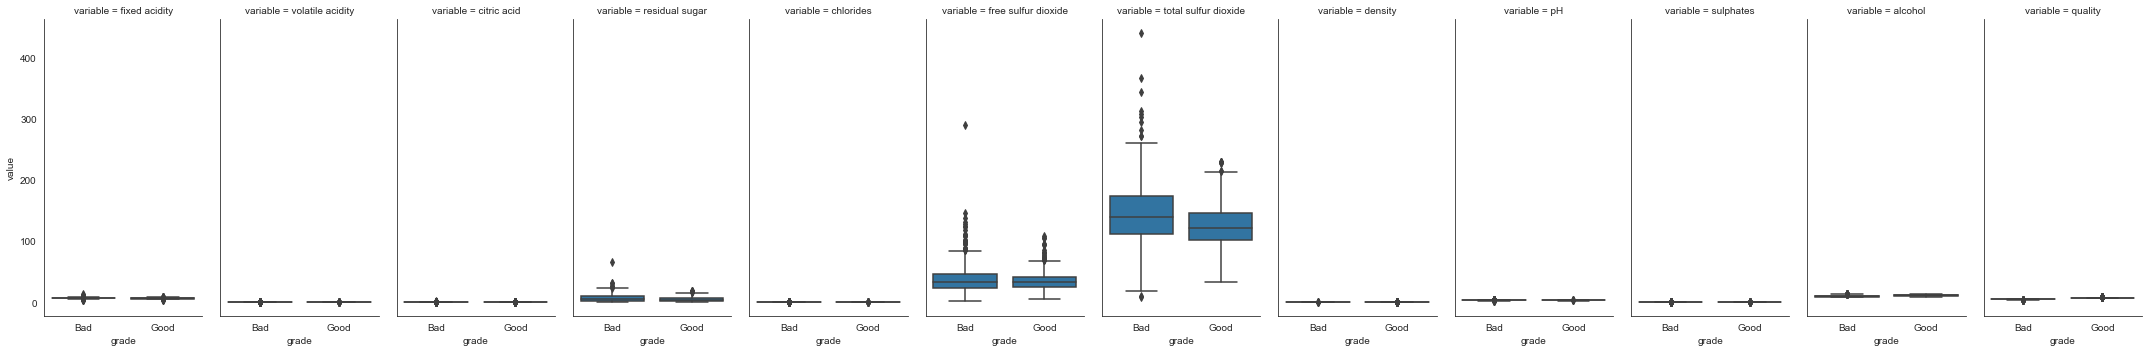

In [14]:
# Restructuring the data to use FacetGrid rather than making a boxplot for each variable individually.
df_long = white_wine
df_long = pd.melt(df_long, id_vars=['grade'])

g = sns.FacetGrid(df_long, col='variable', size=5, aspect=.5)
g = g.map(sns.boxplot, 'grade', 'value')

plt.show()

The visual above shows outliders in the relationships between the depdendent variable grade and independent variables residual sugar, free sulfur dioxide and total sulfur dioxide.

Earlier, the highest correlations in the outcome of interest were with the independent variables alcohol, sulphates and citric acid. Below I will at each of those relationships individually.

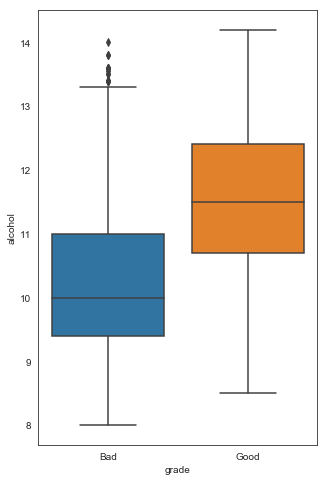

In [15]:
plt.figure(figsize=(5,8))
sns.boxplot('grade', 'alcohol', data=white_wine)

plt.show()

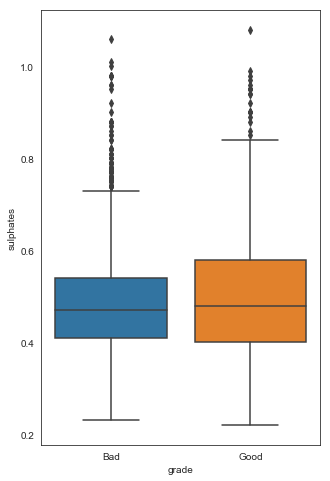

In [16]:
plt.figure(figsize=(5,8))
sns.boxplot('grade', 'sulphates', data=white_wine)

plt.show()

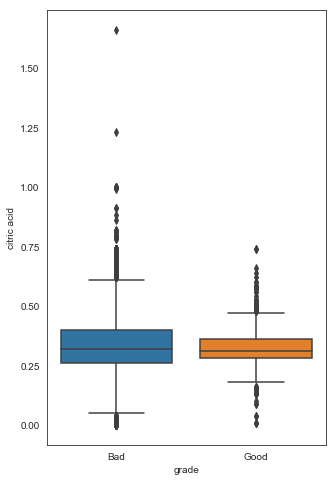

In [17]:
plt.figure(figsize=(5,8))
sns.boxplot('grade', 'citric acid', data=white_wine)

plt.show()

Alcohol is again shown to contribute the most to a white wine's quality rating or in this case, it's grade.

There are outliers shown in each of these boxplots, but the variance or the distance between interquartile ranges is low. This likely explains the large volume of outliers in some variables.

## Feature Engineering and Selection

In [18]:
# Encoding the categorical data for modeling purposes.
white_wine['grade'] = white_wine['grade'].replace(['Good'], 1)
white_wine['grade'] = white_wine['grade'].replace(['Bad'], 2)

# Confirming the categories have been binarized.
white_wine['grade'].unique()

array([2, 1], dtype=int64)

In [19]:
# Checking the counts.
Counter(white_wine['grade'])

Counter({1: 1060, 2: 3838})

In [20]:
# Splitting the data into X and y variables.
X = white_wine.iloc[:, :11]
y = white_wine['grade']

In [21]:
# Normalize the data so that all variables have a mean of 0 and standard deviation of 1.
X = StandardScaler().fit_transform(X)

In [22]:
# Dimensionality reduction using Principal Components Analysis.
sklearn_pca = PCA()
Y_sklearn = sklearn_pca.fit_transform(X)

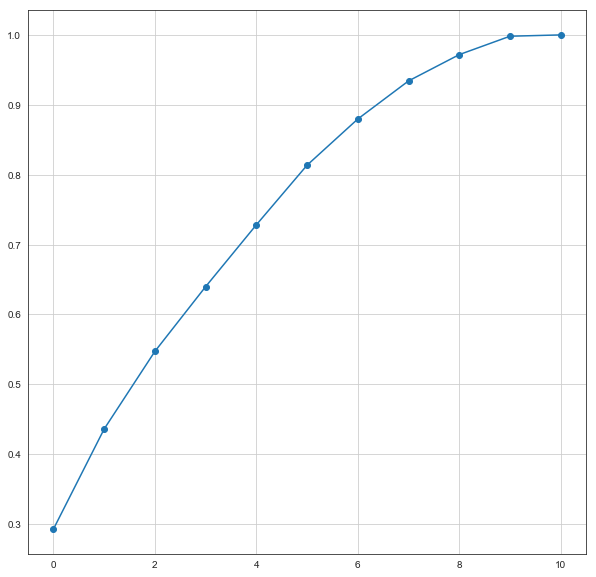

In [23]:
# PLotting to locate the principal components.
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(sklearn_pca.explained_variance_ratio_), 'o-')
plt.grid()

In [24]:
print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.29293217 0.14320363 0.11106103 0.09259294 0.08848496 0.08534014
 0.06605437 0.05448713 0.03764942 0.02631701 0.00187719]


81.3% of the total variance is explained by six of the overall components.

87.9% of the total variance is explained by seven of the overall components.

93.3% of the total variance is explained by eight of the overall components.

In [37]:
# Selecting the first seven components for our prediction.
sklearn_pca2 = PCA(n_components=7)
X2 = sklearn_pca2.fit_transform(X)

## Model Building and Evaluation

As the quality of wine is an observation already recorded, the modeling process will fall under a Supervised Learning approach. Instead of using subjective sensory testing though, each model attempted will be using physicochemcial compounds found in wine to predict or determine the quality of wine through an objective process.

Within Supervised Learning there are two main groups, classification and regression. Since the quality of wine is a categorical variable with a binary outcome (as in this case), I will be using classification techniques in my modeling efforts to identify good and bad quality wines.

A few notes on evaluating classifiers. The data that is directly comparable for model evaluation is the target and y_pred variables. Target is the actual outcomes (whether the wine is good or bad). The y_pred is the predicted outcomes from our classifier.

Accuracy is the most basic measure of success but is usually not sufficient by itself. A confusion matrix shows the count of each permutation of target and prediction so one can see where they may need to improve their model.

There are two kinds of errors in a binary classifier. A false positive (identifying something as when it is not) and a false negative (identifying something as not when it is), aka Type II error. Sensitivity is the percentage of positives correctly identified, whereas specificity is the percentage of negatives correctly identified.

Overfitting is when the model is so excessively complex that it starts to catch random noise instead of describing the true underlying relationships. The simplest way to combat overfitting is with a holdout group (not including all of the data in the training set, instead reserving some of it exclusively for testing).

Cross validation is a more robust version of holdout groups. Instead of creating just one holdout, one would create several. The array that cross_val_score returns is a series of accuracy scores with a different hold out group each time. If the model is overfitting at a variable amount, those scores will fluctuate. The desire is for them to be relatively consistent.

In [38]:
# Splitting the data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.25, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3673, 7)
(3673,)
(1225, 7)
(1225,)


### Logistic Regression

When interested in predicting the probability of an outcome where the outcome is categorical (wine will graded as good or bad), logistic regression is used.

In [39]:
lr = LogisticRegression()

lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

In [40]:
# Print confusion matrix and accuracy rate for evaluation.
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)

print(lr_conf_matrix)
print(lr_acc_score*100)

[[ 59 203]
 [ 40 923]]
80.16326530612244


80% accuracy rate with Logistic Regression.

In [69]:
# Testing the model with cross validation for further evaluation.
cross_val_score(lr, X2, y, cv=10)

array([0.80612245, 0.78367347, 0.80204082, 0.7877551 , 0.83061224,
       0.81632653, 0.78367347, 0.8       , 0.81799591, 0.74233129])

In [70]:
cross_val_score(lr, X2, y, cv=10).mean()

0.7970531279996661

Scores are relatively consistent, the model does not appear to be overfitting.

### Decison Tree

Decision trees is a process of learning from questions, with each question asked providing more information about the observation under consideration or review.

In [42]:
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)
dt_predict = dt.predict(X_test)

In [43]:
# Print confusion matrix and accuracy rate for evaluation.
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)

print(dt_conf_matrix)
print(dt_acc_score*100)

[[161 101]
 [117 846]]
82.20408163265306


82% accuracy rate with Decision Tree Classifier.

In [67]:
# Testing the model with cross validation for further evaluation.
cross_val_score(dt, X2, y, cv=10)

array([0.77142857, 0.75510204, 0.74693878, 0.74693878, 0.76530612,
       0.80612245, 0.70408163, 0.73877551, 0.75255624, 0.68916155])

In [68]:
cross_val_score(dt, X2, y, cv=10).mean()

0.7433496097825634

Scores are relatively consistent, the model does not appear to be overfitting but there is some variance in the cross validation scores to be mindful of when comparing.

### Gradient Boosting Classifier

Gradient boosting is the most common boosting model (a class of ensemble modeling) and can work on any combination of loss function and model type, but most often graident boosting uses decision trees.

In [61]:
gbc = GradientBoostingClassifier(n_estimators=200, 
                                 learning_rate=0.2, 
                                 max_depth=5, 
                                 random_state=5)

gbc.fit(X_train, y_train)
gbc_predict = gbc.predict(X_test)

In [62]:
# Print confusion matrix and accuracy rate for evaluation.
gbc_conf_matrix = confusion_matrix(y_test, gbc_predict)
gbc_acc_score = accuracy_score(y_test, gbc_predict)

print(gbc_conf_matrix)
print(gbc_acc_score*100)

[[130 132]
 [ 53 910]]
84.89795918367346


85% accuracy rate with Graident Boosting Classifier. The model seems to perform best with the number of estimators set at 200.

In [65]:
# Testing the model with cross validation for further evaluation.
cross_val_score(gbc, X2, y, cv=10)

array([0.82244898, 0.7877551 , 0.78163265, 0.78367347, 0.81632653,
       0.82040816, 0.78163265, 0.79387755, 0.82617587, 0.75460123])

In [66]:
cross_val_score(gbc, X2, y, cv=10).mean()

0.7968532198155336

Scores are relatively consistent, the model does not appear to be overfitting.

### Random Forest Classifier

Random forest models use bagging and randome subspace to generate multiple trees that are different, with each tree in the forest getting a vote on the ouctome for a given observation.

In [57]:
rfc = RandomForestClassifier(n_estimators=200)

rfc.fit(X_train, y_train)
rfc_predict = rfc.predict(X_test)

In [58]:
# Print confusion matrix and accuracy rate for evaluation.
rfc_accuracy_score = accuracy_score(y_test, rfc_predict)
rfc_confusion_matrix = confusion_matrix(y_test, rfc_predict)

print(rfc_confusion_matrix)
print(rfc_accuracy_score*100)

[[128 134]
 [ 31 932]]
86.53061224489797


87% accuracy rate with Random Forest Classifier. The model seems to perform best with the number of estimators set at 200.

In [63]:
# Testing the model with cross validation for further evaluation.
cross_val_score(rfc, X2, y, cv=10)

array([0.81020408, 0.8       , 0.81428571, 0.7877551 , 0.83877551,
       0.86326531, 0.8122449 , 0.8244898 , 0.82413088, 0.76278119])

In [64]:
cross_val_score(rfc, X2, y, cv=10).mean()

0.8133867534743958

Scores are relatively consistent, the model does not appear to be overfitting but there is some variance in the cross validation scores to be mindful of when comparing.

### Stochastic Gradient Descent Classifier

As a classifier, it implements a plain stochastic gradient descent learning routine which supports different loss functions and penalties for classification.

In [118]:
sgdc = SGDClassifier(penalty=None, shuffle=True)

sgdc.fit(X_train, y_train)
sgdc_predict = sgdc.predict(X_test)

C:\Users\kenne\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [119]:
# Print confusion matrix and accuracy rate for evaluation.
sgdc_accuracy_score = accuracy_score(y_test, sgdc_predict)
sgdc_confusion_matrix = confusion_matrix(y_test, sgdc_predict)

print(sgdc_confusion_matrix)
print(sgdc_accuracy_score*100)

[[ 91 171]
 [135 828]]
75.0204081632653


75% accuracy rate with Stochastic Gradient Descent Classifier.

In [120]:
# Testing the model with cross validation for further evaluation.
cross_val_score(sgdc, X2, y, cv=10)

C:\Users\kenne\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\kenne\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\kenne\Anaconda3\lib\sit

array([0.83877551, 0.73265306, 0.79183673, 0.78163265, 0.65714286,
       0.76530612, 0.78571429, 0.70408163, 0.77505112, 0.67075665])

In [121]:
cross_val_score(sgdc, X2, y, cv=10).mean()

C:\Users\kenne\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\kenne\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\kenne\Anaconda3\lib\sit

0.7455911689829307

Scores are relatively consistent, the model does not appear to be overfitting but there is some variance in the cross validation scores to be mindful of when comparing.

### Multi-Layer Perceptron Classifier

Perceptron models form the basis of neural networks and at their core are binary classifiers, minimizing the error from misclassified examples.

In [105]:
mlpc = MLPClassifier(solver='lbfgs',
                     alpha=1e-5, 
                     hidden_layer_sizes=(13,10,5),
                     random_state=1,
                     max_iter=500)

mlpc.fit(X_train, y_train)
mlpc_predict = mlpc.predict(X_test)

In [106]:
# Print confusion matrix and accuracy rate for evaluation.
mlpc_conf_matrix = confusion_matrix(y_test, mlpc_predict)
mlpc_acc_score = accuracy_score(y_test, mlpc_predict)

print(mlpc_conf_matrix)
print(mlpc_acc_score*100)

[[118 144]
 [ 88 875]]
81.06122448979592


81% accuracy rate with Graident Boosting Classifier. The model seems to perform best with the number of max iterations set at 500.

In [107]:
# Testing the model with cross validation for further evaluation.
cross_val_score(mlpc, X2, y, cv=10)

array([0.77959184, 0.78163265, 0.79183673, 0.77346939, 0.82244898,
       0.81428571, 0.71836735, 0.79183673, 0.79550102, 0.75664622])

In [108]:
cross_val_score(mlpc, X2, y, cv=10).mean()

0.7825616627018906

Scores are relatively consistent, the model does not appear to be overfitting but there is some variance in the cross validation scores to be mindful of when comparing.

### Support Vector Machine Classifier

Commonly used in classification problems, when given a set of training data marked as belonging to one of two categories (good or bad wine) this algorithm builds a model that assigns new examples to one category or the other.

In [110]:
svc_rbf = SVC(kernel='rbf')

svc_rbf.fit(X_train, y_train)
svc_rbf_predict = svc_rbf.predict(X_test)

In [111]:
# Print confusion matrix and accuracy rate for evaluation.
svc_rbf_conf_matrix = confusion_matrix(y_test, svc_rbf_predict)
svc_rbf_acc_score = accuracy_score(y_test, svc_rbf_predict)

print(svc_rbf_conf_matrix)
print(svc_rbf_acc_score*100)

[[ 68 194]
 [ 39 924]]
80.9795918367347


81% accuracy rate using Support Vector Machine Classifier with a RBF Kernel.

In [112]:
# Testing the model with cross validation for further evaluation.
cross_val_score(svc_rbf, X2, y, cv=10)

array([0.80204082, 0.79591837, 0.80816327, 0.78163265, 0.85102041,
       0.83673469, 0.80204082, 0.8       , 0.8200409 , 0.78732106])

In [113]:
cross_val_score(svc_rbf, X2, y, cv=10).mean()

0.8084912983598347

Scores are relatively consistent, the model does not appear to be overfitting.

In [114]:
svc_lin = SVC(kernel='linear')

svc_lin.fit(X_train, y_train)
svc_lin_predict = svc_lin.predict(X_test)

In [115]:
# Print confusion matrix and accuracy rate for evaluation.
svc_lin_conf_matrix = confusion_matrix(y_test, svc_lin_predict)
svc_lin_acc_score = accuracy_score(y_test, svc_lin_predict)

print(svc_lin_conf_matrix)
print(svc_lin_acc_score*100)

[[  0 262]
 [  0 963]]
78.61224489795919


79% accuracy rate using Support Vector Machine Classifier with a Linear Kernel.

In [116]:
# Testing the model with cross validation for further evaluation.
cross_val_score(svc_lin, X2, y, cv=10)

array([0.78367347, 0.78367347, 0.78367347, 0.78367347, 0.78367347,
       0.78367347, 0.78367347, 0.78367347, 0.78323108, 0.78323108])

In [117]:
cross_val_score(svc_lin, X2, y, cv=10).mean()

0.7835849922791203

Scores are relatively consistent, the model does not appear to be overfitting.

### Final Model Selection = Random Forest Classifier

The Random Forest Classifier produces the highest accuracy rate (87%) amongst the models attempted. Note, this model is also the best performer when ran against the red wine dataset (89%).

By creating a forest, the accuracy in the model increases with the number of trees in the forest until eventually the additional learning from another tree approaches zero (convergance). The forest chooses the classification having the most votes. Because of this robustness, it will be less prone to overfitting than a single tree.

Other notes of interest, it runs efficiently on large databases (which should be the case here) and it can handle several input variables without sacrificing variables. Generated forests can be saved for future use on other data.

The random forest will also let us identify the most important features out of the available features for producing quality wine. And it offers an experimental method for detecting variable interactions. 

Although I did not face the issue/concern of missing data in the dataset used here, this model has an effective method for estimating missing data and maintains accuracy when a large proportion of the data are missing. It also has methods for balancing error in class population unbalanced data sets (such as the case with this dataset).

As noted in the opening of this notebook, this model/process offers an unambiguous, objective standard for the certification and quality assessment in the production of wine that can keep with the rising demand as wine continues to gain in popularity across the globe.

As new products are prepared for introduction to the market, they undergo physicochemical tests in controlled laboratory environments that operate more efficiently than their sensory testing counterparts. As those results become available, the model will be able to quickly assign a quality rating that is fact driven, objective in nature based on the results/measurements of those compounds.